In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import calendar
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

In [5]:
def load_data(base_path):
    item_categories = pd.read_csv(base_path+'item_categories.csv')
    items = pd.read_csv(base_path+'items.csv')
    sales_train = pd.read_csv(base_path+'sales_train.csv')
    shops = pd.read_csv(base_path+'shops.csv')
    test = pd.read_csv(base_path+'test.csv')
    display(item_categories,items,sales_train,shops,test)
    return item_categories, items, sales_train, shops, test
base_path = 'E:/python/data/训练赛/ShopSales/competitive-data-science-predict-future-sales/'
item_categories, items, sales_train, shops, test = load_data(base_path)

item_category_name  item_category_id
0     PC - Гарнитуры/Наушники                 0
1            Аксессуары - PS2                 1
2            Аксессуары - PS3                 2
3            Аксессуары - PS4                 3
4            Аксессуары - PSP                 4
..                        ...               ...
79                  Служебные                79
80         Служебные - Билеты                80
81    Чистые носители (шпиль)                81
82  Чистые носители (штучные)                82
83           Элементы питания                83

[84 rows x 2 columns]

item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1      !ABBYY FineReader 12 Professional Edition Full...        1   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4            ***КОРОБКА (СТЕКЛО)                       D        4   
...                                                  ...      ...   
22165             Ядерный титбит 2 [PC, Цифровая версия]    22165   
22166    Язык запросов 1С:Предприятия  [Цифровая версия]    22166   
22167  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    22167   
22168                                Яйцо для Little Inu    22168   
22169                      Яйцо дракона (Игра престолов)    22169   

       item_category_id  
0                    40  
1                    76  
2                    40  
3                    40  
4                    40  
...                 ...  
22165                31  
22166                54  
22167                49  
22168                62  
22169                69  

[22170 rows x 3 columns]

date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
2935844           1.0  
2935845           1.0  
2935846           1.0  
2935847           1.0  
2935848           1.0  

[2935849 rows x 6 columns]

shop_name  shop_id
0                     !Якутск Орджоникидзе, 56 фран        0
1                     !Якутск ТЦ "Центральный" фран        1
2                                  Адыгея ТЦ "Мега"        2
3                    Балашиха ТРК "Октябрь-Киномир"        3
4                          Волжский ТЦ "Волга Молл"        4
5                            Вологда ТРЦ "Мармелад"        5
6                        Воронеж (Плехановская, 13)        6
7                            Воронеж ТРЦ "Максимир"        7
8                      Воронеж ТРЦ Сити-Парк "Град"        8
9                                 Выездная Торговля        9
10                       Жуковский ул. Чкалова 39м?       10
11                       Жуковский ул. Чкалова 39м²       11
12                              Интернет-магазин ЧС       12
13                              Казань ТЦ "Бехетле"       13
14                          Казань ТЦ "ПаркХаус" II       14
15                             Калуга ТРЦ "XXI век"       15
16                                 Коломна ТЦ "Рио"       16
17                    Красноярск ТЦ "Взлетка Плаза"       17
18                             Красноярск ТЦ "Июнь"       18
19                            Курск ТЦ "Пушкинский"       19
20                              Москва "Распродажа"       20
21                           Москва МТРЦ "Афи Молл"       21
22                               Москва Магазин С21       22
23                 Москва ТК "Буденовский" (пав.А2)       23
24                 Москва ТК "Буденовский" (пав.К7)       24
25                              Москва ТРК "Атриум"       25
26                      Москва ТЦ "Ареал" (Беляево)       26
27                   Москва ТЦ "МЕГА Белая Дача II"       27
28                  Москва ТЦ "МЕГА Теплый Стан" II       28
29               Москва ТЦ "Новый век" (Новокосино)       29
30                           Москва ТЦ "Перловский"       30
31                          Москва ТЦ "Семеновский"       31
32                       Москва ТЦ "Серебряный Дом"       32
33                                Мытищи ТРК "XL-3"       33
34                             Н.Новгород ТРЦ "РИО"       34
35                      Н.Новгород ТРЦ "Фантастика"       35
36            Новосибирск ТРЦ "Галерея Новосибирск"       36
37                            Новосибирск ТЦ "Мега"       37
38                                   Омск ТЦ "Мега"       38
39            РостовНаДону ТРК "Мегацентр Горизонт"       39
40  РостовНаДону ТРК "Мегацентр Горизонт" Островной       40
41                           РостовНаДону ТЦ "Мега"       41
42                           СПб ТК "Невский Центр"       42
43                                  СПб ТК "Сенная"       43
44                              Самара ТЦ "Мелодия"       44
45                             Самара ТЦ "ПаркХаус"       45
46                            Сергиев Посад ТЦ "7Я"       46
47                           Сургут ТРЦ "Сити Молл"       47
48                     Томск ТРЦ "Изумрудный Город"       48
49                            Тюмень ТРЦ "Кристалл"       49
50                               Тюмень ТЦ "Гудвин"       50
51                        Тюмень ТЦ "Зеленый Берег"       51
52                             Уфа ТК "Центральный"       52
53                                 Уфа ТЦ "Семья" 2       53
54                                  Химки ТЦ "Мега"       54
55                         Цифровой склад 1С-Онлайн       55
56                             Чехов ТРЦ "Карнавал"       56
57                          Якутск Орджоникидзе, 56       57
58                          Якутск ТЦ "Центральный"       58
59                           Ярославль ТЦ "Альтаир"       59

ID  shop_id  item_id
0            0        5     5037
1            1        5     5320
2            2        5     5233
3            3        5     5232
4            4        5     5268
...        ...      ...      ...
214195  214195       45    18454
214196  214196       45    16188
214197  214197       45    15757
214198  214198       45    19648
214199  214199       45      969

[214200 rows x 3 columns]

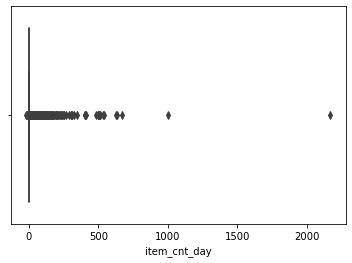

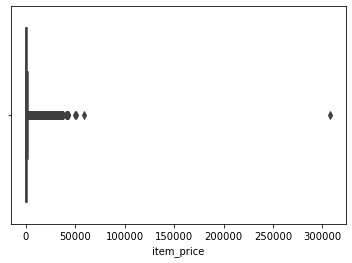

In [8]:
sns.boxplot(x=sales_train.item_cnt_day)
plt.show()
sns.boxplot(x=sales_train.item_price)

In [9]:
train = sales_train[(sales_train.item_price<100000) & (sales_train.item_price>0)]
train = train[sales_train.item_price<1000]

In [13]:
print(shops[shops.shop_id.isin([0, 57])]['shop_name'])
print(shops[shops.shop_id.isin([1, 58])]['shop_name'])
print(shops[shops.shop_id.isin([40, 39])]['shop_name'])
shops

0     !Якутск Орджоникидзе, 56 фран
57          Якутск Орджоникидзе, 56
Name: shop_name, dtype: object
1     !Якутск ТЦ "Центральный" фран
58          Якутск ТЦ "Центральный"
Name: shop_name, dtype: object
39              РостовНаДону ТРК "Мегацентр Горизонт"
40    РостовНаДону ТРК "Мегацентр Горизонт" Островной
Name: shop_name, dtype: object


shop_name  shop_id
0                     !Якутск Орджоникидзе, 56 фран        0
1                     !Якутск ТЦ "Центральный" фран        1
2                                  Адыгея ТЦ "Мега"        2
3                    Балашиха ТРК "Октябрь-Киномир"        3
4                          Волжский ТЦ "Волга Молл"        4
5                            Вологда ТРЦ "Мармелад"        5
6                        Воронеж (Плехановская, 13)        6
7                            Воронеж ТРЦ "Максимир"        7
8                      Воронеж ТРЦ Сити-Парк "Град"        8
9                                 Выездная Торговля        9
10                       Жуковский ул. Чкалова 39м?       10
11                       Жуковский ул. Чкалова 39м²       11
12                              Интернет-магазин ЧС       12
13                              Казань ТЦ "Бехетле"       13
14                          Казань ТЦ "ПаркХаус" II       14
15                             Калуга ТРЦ "XXI век"       15
16                                 Коломна ТЦ "Рио"       16
17                    Красноярск ТЦ "Взлетка Плаза"       17
18                             Красноярск ТЦ "Июнь"       18
19                            Курск ТЦ "Пушкинский"       19
20                              Москва "Распродажа"       20
21                           Москва МТРЦ "Афи Молл"       21
22                               Москва Магазин С21       22
23                 Москва ТК "Буденовский" (пав.А2)       23
24                 Москва ТК "Буденовский" (пав.К7)       24
25                              Москва ТРК "Атриум"       25
26                      Москва ТЦ "Ареал" (Беляево)       26
27                   Москва ТЦ "МЕГА Белая Дача II"       27
28                  Москва ТЦ "МЕГА Теплый Стан" II       28
29               Москва ТЦ "Новый век" (Новокосино)       29
30                           Москва ТЦ "Перловский"       30
31                          Москва ТЦ "Семеновский"       31
32                       Москва ТЦ "Серебряный Дом"       32
33                                Мытищи ТРК "XL-3"       33
34                             Н.Новгород ТРЦ "РИО"       34
35                      Н.Новгород ТРЦ "Фантастика"       35
36            Новосибирск ТРЦ "Галерея Новосибирск"       36
37                            Новосибирск ТЦ "Мега"       37
38                                   Омск ТЦ "Мега"       38
39            РостовНаДону ТРК "Мегацентр Горизонт"       39
40  РостовНаДону ТРК "Мегацентр Горизонт" Островной       40
41                           РостовНаДону ТЦ "Мега"       41
42                           СПб ТК "Невский Центр"       42
43                                  СПб ТК "Сенная"       43
44                              Самара ТЦ "Мелодия"       44
45                             Самара ТЦ "ПаркХаус"       45
46                            Сергиев Посад ТЦ "7Я"       46
47                           Сургут ТРЦ "Сити Молл"       47
48                     Томск ТРЦ "Изумрудный Город"       48
49                            Тюмень ТРЦ "Кристалл"       49
50                               Тюмень ТЦ "Гудвин"       50
51                        Тюмень ТЦ "Зеленый Берег"       51
52                             Уфа ТК "Центральный"       52
53                                 Уфа ТЦ "Семья" 2       53
54                                  Химки ТЦ "Мега"       54
55                         Цифровой склад 1С-Онлайн       55
56                             Чехов ТРЦ "Карнавал"       56
57                          Якутск Орджоникидзе, 56       57
58                          Якутск ТЦ "Центральный"       58
59                           Ярославль ТЦ "Альтаир"       59

In [15]:
train.loc[train.shop_id==0,'shop_id'] = 57
test.loc[test.shop_id==0,'shop_id'] = 57
train.loc[train.shop_id==1,'shop_id'] = 58
test.loc[test.shop_id==1,'shop_id'] = 58
train.loc[train.shop_id==39,'shop_id'] = 40
test.loc[test.shop_id==39,'shop_id'] = 40

In [21]:
df = []
index_cols = ['shop_id', 'item_id', 'date_block_num']
for block_num in train.date_block_num.unique():
    cur_shops = train.loc[sales_train['date_block_num']== block_num,'shop_id'].unique()
    cur_items = train.loc[sales_train['date_block_num']==block_num, 'item_id'].unique()
    df.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype=np.int32))
df = pd.DataFrame(np.vstack(df), columns = index_cols,dtype=np.int32)
group = train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': ['sum']})
group.columns = ['item_cnt_month']
group.reset_index(inplace=True)

df = pd.merge(df, group, on=index_cols, how='left')
df['item_cnt_month'] = (df['item_cnt_month']
                                .fillna(0)
                                .clip(0,20)
                                .astype(np.float16))
df.head(5)


shop_id  item_id  date_block_num  item_cnt_month
0       59    22154               0             1.0
1       59     2552               0             0.0
2       59     2564               0             0.0
3       59     2565               0             0.0
4       59     2572               0             0.0

In [23]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)
df = pd.concat([df, test], ignore_index=True, sort=False, keys=index_cols)
df.fillna(0, inplace=True)